# Introduction

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.

**Project Steps Overview**
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

(Via Udacity's project overview page) 

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

# 1. Gathering the Data

1.**Twitter archive file:** This file was downloaded manually by clicking on the link: twitter_archive_enhanced.csv

2.**The tweet image predictions:** This file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3.**Additional data from the Twitter API:** Gather each tweet's retweet count and favorite ("like") count at the minimum and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

(Via Udacity's Step 1: Gathering Data page)

## A. Importing the enhanced twitter archive 

In [2]:
#Twitter archive was downloaded using the provided link
t_archive = pd.read_csv('twitter-archive-enhanced.csv')

## B. Downloading the tweet image predictions

In [3]:
#The tsv file w was downloaded using the request library and the URL given below:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open ('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

## C. Getting tweet data from twitter api

In [4]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json

#downloading data from twitter API
#queery twitter api for each tweet in the twitter archive and save JSON in a text file. theyy are hidden to comply with twitter terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

#tweet ids used to gather additional data via twitter api
tweet_ids = t_archive.tweet_id.values

In [ ]:
# Set the function for tweet extraction
# The file is already created so there is no need to run this cell

def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepyException as e:
                print("Fail")
                fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
        


The above code template was provided by Udacity

In [5]:
#converting the txt file to data list where each line contains one piece of tweet information

df_list = []
with open('tweet-json2.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [6]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
#creating a dataframe that contains the id, retweet count and favourite count
tweet_data = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [8]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
#renaming the columns to make analysis easier
tweet_data = tweet_data.rename(columns ={'id':'tweet_id', 'retweet_count':'Retweet_count', 'favorite_count':'Favorite_count'})
tweet_data.head()

,tweet_id,Retweet_count,Favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# 2. Acessing the data

**1. Visual assessment:** Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).

**2. Programmatic assessment:** Pandas' functions and/or methods are used to assess the data.

**3. Detect and document at least 8 quality issues and 2 tidiness issues:** Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
(Via Udacity's Step 2: Assessing Data page)

### 1. Visual assessment

In [10]:
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
t_archive.sample(12)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None
170,859074603037188101,NaN,NaN,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,None,None,None
1539,689661964914655233,NaN,NaN,2016-01-20 04:13:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Luca. He's a Butternut Scooperfloof. Glor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689661964...,12,10,Luca,None,None,None,None
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's trying to float away. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742161199...,12,10,Doug,None,None,None,None
1122,730573383004487680,NaN,NaN,2016-05-12 01:40:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rooney. He can't comprehend glass. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730573383...,10,10,Rooney,None,None,pupper,None
831,768609597686943744,NaN,NaN,2016-08-25 00:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. His sweater is too small and he a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768609597...,10,10,Lou,None,None,None,None
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
107,871762521631449091,NaN,NaN,2017-06-05 16:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871762521...,12,10,Rover,None,None,pupper,None
2196,668852170888998912,NaN,NaN,2015-11-23 18:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobb. Bobb is a Golden High Fescu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668852170...,11,10,Bobb,None,None,None,None


### 2. Programmatic assessment

#### 1. Twitter archive

In [12]:
#checking the datatypes and columns number and names
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# the statistics of the data
t_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#the shape of data rows and colums 
t_archive.shape

(2356, 17)

In [15]:
#check the tweet_id for duplicates
t_archive.tweet_id.duplicated().sum()

0

In [16]:
t_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [17]:
#checking which ids have rating numerators less than 10
t_archive[t_archive.rating_numerator <10].count()[0]

440

In [18]:
t_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [19]:
#checking which ids havee numerators with less than 10
t_archive[t_archive.rating_denominator <10].tweet_id 

313     835246439529840640
516     810984652412424192
2335    666287406224695296
Name: tweet_id, dtype: int64

In [20]:
# check retweet tweets 
t_archive.retweeted_status_user_id.count()

181

In [21]:
#check the total amountt of duplicated ids
sum(t_archive['tweet_id'].duplicated())

0

In [22]:
#listing all columns names
list(t_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [23]:
#check the names value count
t_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Daisy         7
an            7
Toby          7
Bailey        7
Jax           6
Bella         6
Rusty         6
Jack          6
Milo          6
Dave          6
Leo           6
Oscar         6
Scout         6
Stanley       6
Koda          6
Oakley        5
           ... 
Shelby        1
Hamrick       1
Peanut        1
Henry         1
Lupe          1
Bradley       1
Hero          1
Brandy        1
Tobi          1
Skittle       1
Sailor        1
Murphy        1
Bruno         1
Leonidas      1
Mairi         1
Marvin        1
Pinot         1
Harvey        1
Farfle        1
Billy         1
space         1
Edd           1
Napolean      1
Arlen         1
Jed           1
Reagan        1
Tonks         1
Ricky         1
Aubie         1
Blanket       1
Name: name, Length: 957,

#### B. Acessing the tweet image predictions

In [24]:
i_predictions = pd.read_csv('image-predictions.tsv')
i_predictions.head()

,tweet_id jpg_url img_num p1 p1_conf p1_dog p2 p2_conf p2_dog p3 p3_conf p3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [25]:
#The column tabs are together so we use sep=\t to seperate the tabs
i_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
i_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
#sample of the first 12 rows
i_predictions.sample(12)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
887,699072405256409088,https://pbs.twimg.com/ext_tw_video_thumb/69907...,1,Shih-Tzu,0.599587,True,Pekinese,0.213069,True,Maltese_dog,0.154293,True
820,692919143163629568,https://pbs.twimg.com/media/CZ2-SRiWcAIjuM5.jpg,1,Saint_Bernard,0.612635,True,English_springer,0.269744,True,boxer,0.048666,True
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
916,701545186879471618,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True
1545,792050063153438720,https://pbs.twimg.com/media/Cv3tU38WcAASFas.jpg,2,komondor,0.942856,True,swab,0.052715,False,Tibetan_terrier,0.002743,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False
1141,729838605770891264,https://pbs.twimg.com/ext_tw_video_thumb/72983...,1,stone_wall,0.758218,False,patio,0.074205,False,prison,0.013826,False
1124,727286334147182592,https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg,1,bonnet,0.146440,False,sock,0.083091,False,Chihuahua,0.070554,True


In [27]:
#checking to see how one of the photos twitted was identified as a dog
#using the 5th row of our sample data
i_predictions.loc[1569, 'jpg_url']

'https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg'

In [28]:
from IPython.display import Image
Image(url ='https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg')

In [29]:
# checking for duplicates in the jpg_url column
i_predictions.jpg_url.duplicated().sum()

66

In [30]:
#checking for lost pictures
i_predictions.img_num.isnull().sum()

0

In [31]:
#checking datatype and columns 
i_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
#checking for duplicate tweet ids
i_predictions.tweet_id.duplicated().sum()

0

#### B. Acessing the tweet data from twitter api

In [33]:
tweet_data.head()

,tweet_id,Retweet_count,Favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [34]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
Retweet_count     2354 non-null int64
Favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### 3. Detect and document at least 8 quality issues and 2 tidiness issues

#### Tidiness
1. There are 4 columns meant for dogs. They are to be combined into one column called dog stage. Then the individual columns will be deleted.
2. Change the timestamp from string to datetime. Create new columns for year, month and day of week.
3. All data (twitter archive, tweet data and tweet image predictions) is related but seperated into three columns so they need to be merged.

#### Quality
##### Twitter archive enhanced
1. Make the rating denominator column standard to be 10. The rating numerators can be greater than the denominators.
2. Renaming column from 'text' to 'tweet'
3. Creating a new column for 'rating'
4. Delete unwanted columns not need in the analysis.
5. Remove all wrong values for dogs in the name column such as 'a' and 'none'. Make the first letter capital for all names and replace 'none' with 'nan'.
6. Change tweet id data type from integer to string.
7. Keep original tweets (no retweets) that have images.
8. Excluding uneeded data

##### Image predictions
1. Delete duplicate values for images
2. Delete rows with missing photos
3. Some p names start with upper case and some lower case which should be changed.
4. P1, P2, and P3 contains underscores instead of spaces in the string.


##### Tweet data from twitter api
1. Delete rows without retweet count entries


# 2. Cleaning Data

In [35]:
#Creating data frame copies
clean_t_archive = t_archive.copy()
clean_i_predictions = i_predictions.copy()
clean_tweet_data = tweet_data.copy()

In [36]:
clean_t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [37]:
clean_tweet_data.head()

,tweet_id,Retweet_count,Favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [38]:
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Tidiness

### 1. There are 4 columns meant for dogs. 

**Define** 

The four columns are to be combined into one column called dog stage. Then the individual columns will be deleted.

**Code**

In [39]:
#creating a new column for dog stage
clean_t_archive['dog_stage'] = clean_t_archive['text'].str.extract('(doggo|pupper|floofer|puppo)')
clean_t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [40]:
#dropping uneeded columns
clean_t_archive = clean_t_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

**Test**

In [41]:
clean_t_archive.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

## 2. The column 'timestamp' is in string instead of datetime

**Define**

Change the timestamp from string to datetime. Create new columns for year, month and day of week.

**Code**


In [42]:
#convert timestamp to datetime
clean_t_archive['timestamp'] = pd.to_datetime(clean_t_archive['timestamp'])

#extract year, month and day to new columns
clean_t_archive['year'] = clean_t_archive['timestamp'].dt.year
clean_t_archive['month'] = clean_t_archive['timestamp'].dt.month
clean_t_archive['weekday'] = clean_t_archive['timestamp'].dt.day_name()

**Test**

In [43]:
#to check extract year, month and day to new columns

clean_t_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,weekday
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,2015,11,Monday
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,2015,11,Monday
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,2015,11,Sunday
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,2015,11,Sunday
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN,2015,11,Sunday


## 3. Data is seperated in three columns

**Define**

All data (twitter archive, tweet data and tweet image predictions is is related but seperated into three columns so they need to be merged and this will be based on the tweet id column

**Code**

In [44]:
#merging the twitter archive data with the tweet data from twitter api
clean_t_archive = pd.merge(clean_t_archive, clean_tweet_data, on= 'tweet_id', how= 'left')
#merging the merged data with tweet image predictions
clean_t_archive = pd.merge(clean_t_archive, clean_i_predictions, on= 'tweet_id', how= 'left')

**Test**

In [45]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
year                          2356 non-null int64
month                         2356 non-null int64
weekday                       2356 non-null object
Retweet_count              

# Quality

## A.Twitter archive enhanced

### 1. There are rating denominators less than 10

**Define**

Make the rating denominator column standard to be 10. The rating numerators can be greater than the denominators.

**Code**

In [46]:
# using the 'for' loop to set rating denominator rate to 10

for x in clean_t_archive.rating_denominator:
    clean_t_archive.rating_denominator=10.0

**Test**

In [47]:
#test total rating_denominator which still has value more than 10
sum(clean_t_archive.rating_denominator>10)

0

## 2. Renaming column from 'text' to 'tweet'

**Define**

Changing column name for an easier analysis

**Code**

In [48]:
#renaming the 'text' column to 'tweet'
clean_t_archive.rename(columns={'text':'tweet'},inplace=True)

**Tweet**

In [49]:
#chcek list of columns to confirm rename done or not
list(clean_t_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'tweet',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'year',
 'month',
 'weekday',
 'Retweet_count',
 'Favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

# 3. Creating a new column for rating

**Define**

Add new 'rating' column by dividing rating_numerator by rating_denominator

**Code**

In [50]:
clean_t_archive['rating'] = clean_t_archive['rating_numerator'] / clean_t_archive['rating_denominator']

**Test**

In [51]:
clean_t_archive['rating']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
7       1.3
8       1.3
9       1.4
10      1.3
11      1.3
12      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
19      1.3
20      1.2
21      1.3
22      1.4
23      1.3
24      1.3
25      1.2
26      1.3
27      1.3
28      1.3
29      1.2
       ... 
2326    0.2
2327    0.7
2328    0.9
2329    1.1
2330    0.6
2331    0.8
2332    1.0
2333    0.9
2334    0.3
2335    0.1
2336    1.1
2337    1.0
2338    0.1
2339    1.1
2340    0.8
2341    0.9
2342    0.6
2343    1.0
2344    0.9
2345    1.0
2346    0.8
2347    0.9
2348    1.0
2349    0.2
2350    1.0
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: rating, Length: 2356, dtype: float64

## 4. Delete unwanted columns not need in the analysis.

**Define**

Delete columns not needed

**Code**

In [52]:
#dropping columns
clean_t_archive = clean_t_archive.drop(columns =['retweeted_status_user_id', 'source', 'expanded_urls', 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_timestamp'])


**Test**

In [53]:
#checking to see if they were dropped
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id               2356 non-null int64
timestamp              2356 non-null datetime64[ns]
tweet                  2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null float64
name                   2356 non-null object
dog_stage              399 non-null object
year                   2356 non-null int64
month                  2356 non-null int64
weekday                2356 non-null object
Retweet_count          2354 non-null float64
Favorite_count         2354 non-null float64
jpg_url                2075 non-null object
img_num                2075 non-null float64
p1                     2075 non-null object
p1_conf                2075 non-null float64
p1_dog                 2075 non-null object
p2                     2075 non-null object
p2_conf                2075 non-null float64
p2_d

# 5. Some values for dogs are wrong

**Define**

Remove all wrong values for dogs in the name column such as 'a' and 'none'. Make the first letter capital for all names and replace 'none' with 'nan'.

**Code**

In [54]:
#drop 'a' 
for x in clean_t_archive['name']:
    if x == "a":
        clean_t_archive.name=clean_t_archive.name.replace('a',np.nan)

In [55]:
# change 'None' to be NaN, np.nan
clean_t_archive['name'] = clean_t_archive['name'].replace('None', np.nan)
#change all name first Capital letter
clean_t_archive['name'] = clean_t_archive['name'].str.capitalize()

**Test**

In [56]:
# check names value count
clean_t_archive['name'].value_counts()

Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
The          8
Sadie        8
Buddy        7
An           7
Toby         7
Bailey       7
Daisy        7
Stanley      6
Leo          6
Koda         6
Scout        6
Oscar        6
Dave         6
Jack         6
Rusty        6
Bella        6
Jax          6
Milo         6
Chester      5
Very         5
Bentley      5
            ..
Rumpole      1
Shelby       1
Hamrick      1
Peanut       1
Lupe         1
Brandy       1
Marlee       1
Aubie        1
Hero         1
By           1
Skittle      1
Sailor       1
Murphy       1
Bruno        1
Leonidas     1
Mairi        1
Marvin       1
Pinot        1
Harvey       1
Farfle       1
Billy        1
Timofy       1
Edd          1
Napolean     1
Rilo         1
Jed          1
Reagan       1
Tonks        1
Ricky        1
Blanket      1
Name: name, Length: 955, dtype: int64

## 6. Tweet id data type is wrong

**Define**
Change tweet id data type from integer to string.

**Code**

In [57]:
clean_t_archive.tweet_id = clean_t_archive.tweet_id.astype(str)
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id               2356 non-null object
timestamp              2356 non-null datetime64[ns]
tweet                  2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null float64
name                   1556 non-null object
dog_stage              399 non-null object
year                   2356 non-null int64
month                  2356 non-null int64
weekday                2356 non-null object
Retweet_count          2354 non-null float64
Favorite_count         2354 non-null float64
jpg_url                2075 non-null object
img_num                2075 non-null float64
p1                     2075 non-null object
p1_conf                2075 non-null float64
p1_dog                 2075 non-null object
p2                     2075 non-null object
p2_conf                2075 non-null float64
p2_

# 7. Keep original tweets (no retweets) that have images

**Define**

Keep original ratings (no retweets) that contain images

**Code**

In [58]:
# excluding all the retweets by filttering them
clean_t_archive=clean_t_archive[clean_t_archive['retweeted_status_id'].isnull()]
#check retweeted_status_user_id have any retweet
clean_t_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id               2175 non-null object
timestamp              2175 non-null datetime64[ns]
tweet                  2175 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null float64
name                   1440 non-null object
dog_stage              364 non-null object
year                   2175 non-null int64
month                  2175 non-null int64
weekday                2175 non-null object
Retweet_count          2175 non-null float64
Favorite_count         2175 non-null float64
jpg_url                1994 non-null object
img_num                1994 non-null float64
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null object
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_do

## 8. Excluding uneeded data 

**Define**

There is no use for data beyond August 1st, 2017. So, we are going to exclude it

**Code**

In [59]:
#No use for data beyond August 1st, 2017
clean_t_archive.sort_values(by=['year','month','weekday'])

,tweet_id,timestamp,tweet,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage,year,month,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
2123,670385711116361728,2015-11-27 23:36:23,Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,8,10.0,Larry,NaN,2015,11,...,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True,0.8
2124,670374371102445568,2015-11-27 22:51:19,Meet Daisy. She's rebellious. Full of teen ang...,NaN,12,10.0,Daisy,NaN,2015,11,...,English_springer,0.974936,True,English_setter,0.011661,True,cocker_spaniel,0.002689,True,1.2
2125,670361874861563904,2015-11-27 22:01:40,This is a Rich Mahogany Seltzer named Cherokee...,NaN,9,10.0,NaN,NaN,2015,11,...,platypus,0.974075,False,spotted_salamander,0.011068,False,bison,0.003897,False,0.9
2126,670338931251150849,2015-11-27 20:30:30,This is Butters. He's not ready for Thanksgivi...,NaN,10,10.0,Butters,NaN,2015,11,...,cairn,0.245033,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True,1.0
2127,670319130621435904,2015-11-27 19:11:49,AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,NaN,11,10.0,NaN,NaN,2015,11,...,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True,1.1
2128,670303360680108032,2015-11-27 18:09:09,This is a Speckled Cauliflower Yosemite named ...,NaN,9,10.0,NaN,NaN,2015,11,...,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,0.156249,False,0.9
2129,670290420111441920,2015-11-27 17:17:44,This is Sandra. She's going skydiving. Nice ad...,NaN,11,10.0,Sandra,NaN,2015,11,...,Chihuahua,0.368876,True,Pomeranian,0.282102,True,papillon,0.178795,True,1.1
2130,670093938074779648,2015-11-27 04:16:59,This is Wally. He's a Flaccid Mitochondria. Go...,NaN,9,10.0,Wally,NaN,2015,11,...,toy_poodle,0.383346,True,miniature_poodle,0.153678,True,chow,0.138543,True,0.9
2131,670086499208155136,2015-11-27 03:47:25,"""Hi yes this is dog. I can't help with that s-...",NaN,10,10.0,NaN,NaN,2015,11,...,German_short-haired_pointer,0.273492,True,Staffordshire_bullterrier,0.132944,True,bluetick,0.124562,True,1.0
2132,670079681849372674,2015-11-27 03:20:20,Meet Fabio. He's a wonderful pup. Can't stay a...,NaN,10,10.0,Fabio,NaN,2015,11,...,mud_turtle,0.157477,False,terrapin,0.131846,False,box_turtle,0.060678,False,1.0


# B. Image predictions

#### 1. There are duplicate values for images

**Define**

Delete duplicate values for images

**Code**

In [60]:
# cleaning should by using the copy from the main data frame
clean_image=i_predictions.copy()

In [61]:
#drop duplicate value
clean_image=clean_image.drop_duplicates(subset=['jpg_url'], keep='first')

**Test**

In [62]:
# testing if still have dublicate values in jpg_url column
clean_image.jpg_url.duplicated().sum()

0

### 2. Some rows have missing photos

**Define**


Delete rows with missing photos

**Code**

In [63]:
clean_t_archive = clean_t_archive[clean_t_archive.jpg_url.notnull()]


**Test**

In [64]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id               1994 non-null object
timestamp              1994 non-null datetime64[ns]
tweet                  1994 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       1994 non-null int64
rating_denominator     1994 non-null float64
name                   1393 non-null object
dog_stage              326 non-null object
year                   1994 non-null int64
month                  1994 non-null int64
weekday                1994 non-null object
Retweet_count          1994 non-null float64
Favorite_count         1994 non-null float64
jpg_url                1994 non-null object
img_num                1994 non-null float64
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null object
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_do

## 3. Some p names start with upper case and some lower case which should be changed.

**Define**

Make all the letters uniform in each of the p columns

**Code**


In [65]:
clean_t_archive.p1 = clean_t_archive.p1.str.title()
clean_t_archive.p2 = clean_t_archive.p2.str.title()
clean_t_archive.p3 = clean_t_archive.p3.str.title()

**Test**

In [66]:
clean_t_archive.p1.head()

0         Orange
1      Chihuahua
2      Chihuahua
3    Paper_Towel
4         Basset
Name: p1, dtype: object

In [67]:
clean_t_archive.p2.head()

0                 Bagel
1              Pekinese
2              Malamute
3    Labrador_Retriever
4      English_Springer
Name: p2, dtype: object

In [68]:
clean_t_archive.p3.head()

0                         Banana
1                       Papillon
2                         Kelpie
3                        Spatula
4    German_Short-Haired_Pointer
Name: p3, dtype: object

In [69]:
#check if first letter of all words in p1 is in capital
(clean_t_archive.p1.str.istitle()).value_counts()

True    1994
Name: p1, dtype: int64

In [70]:
#check if first letter of all words in p1 is in capital
(clean_t_archive.p2.str.istitle()).value_counts()

True    1994
Name: p2, dtype: int64

In [71]:
#check if first letter of all words in p1 is in capital
(clean_t_archive.p3.str.istitle()).value_counts()

True    1994
Name: p3, dtype: int64

## 4. p1, p2, and p3 contains underscores in the string.

**Define**

Replace underscores with spaces 

**Code**

In [73]:
clean_t_archive['p1'].replace('_', ' ', regex=True, inplace = True)
clean_t_archive['p2'].replace('_', ' ', regex=True, inplace = True)
clean_t_archive['p3'].replace('_', ' ', regex=True, inplace = True)

**Test**

In [74]:
clean_t_archive['p1']

0                            Orange
1                         Chihuahua
2                         Chihuahua
3                       Paper Towel
4                            Basset
5          Chesapeake Bay Retriever
6                       Appenzeller
7                        Pomeranian
8                     Irish Terrier
9                          Pembroke
10                          Samoyed
11                   French Bulldog
12                         Pembroke
13                   French Bulldog
14                 Golden Retriever
15                          Whippet
16                 Golden Retriever
17                 Golden Retriever
18                   Siberian Husky
20                   French Bulldog
21                           Basset
22                        Limousine
23                         Pembroke
24                 Mexican Hairless
25                          Samoyed
26                        Chihuahua
27                           Kuvasz
28                      Conv

## C. Tweet data from twitter api

#### 1. Delete rows without retweet count entries

**Define**

This has been done white taking care of other things

**Code**

In [75]:
sum(clean_t_archive.Retweet_count.isnull())

0

In [76]:
list(clean_t_archive)

['tweet_id',
 'timestamp',
 'tweet',
 'retweeted_status_id',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'year',
 'month',
 'weekday',
 'Retweet_count',
 'Favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'rating']

# 4. Storing Data

In the "Storing Data" section in the wrangle_act.ipynb notebook, store the cleaned master DataFrame in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. 

(Via Udacity's Step 4: storing data page)

In [77]:
clean_t_archive.to_csv('twitter_archive_master.csv')

# 5. Analysing and visualising the data

In the Analyzing and Visualizing Data section in your wrangle_act.ipynb Jupyter Notebook, analyze and visualize your wrangled data.

You must produce at least three (3) insights and one (1) visualization.
You must clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization.


(Via Udacity's Step 5: analysing and visualising data page)

### A. Showing the relationship between retweet count and favorite count 

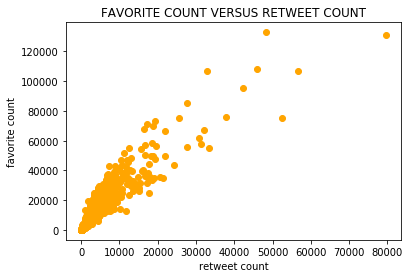

In [78]:
#Showing the relationship between retweet count and favorite count using a scatter plot
plt.scatter(clean_t_archive.Retweet_count, clean_t_archive.Favorite_count, color='orange')

plt.xlabel('retweet count')
plt.ylabel('favorite count')
plt.title('FAVORITE COUNT VERSUS RETWEET COUNT')

plt.show()

**Insight**

The graph shows that there is a linear relationship between favourite tweet and recount tweet. A relationship is linear if one variable increases by approximately the same rate as the other variables changes by one unit. The slope of the plot is also upwards which indicates that there is a high positive correlation between retweet count and favourite count.

## B. Showing the most common dog stages

In [79]:
#Value count for dog stages 
stage_df = clean_t_archive.dog_stage.value_counts()
stage_df

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

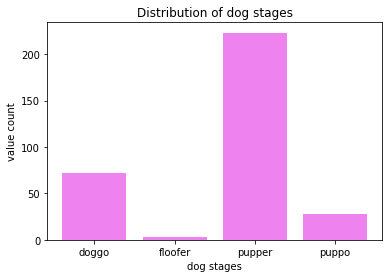

In [80]:
#showing the distribution of dog stages on a bar chart
dog_stage = ['pupper', 'doggo', 'puppo', 'floofer' ]
value =[223, 72, 28, 3]
plt.bar(dog_stage, value, color='violet')
plt.xlabel('dog stages')
plt.ylabel('value count')
plt.title('Distribution of dog stages')
plt.show()

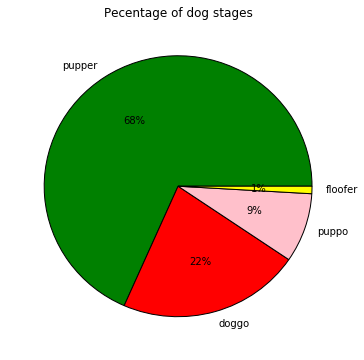

In [81]:
#pie chart showing the percentage of the most common dog stages

data = [223, 72, 28, 3]
labels = ['pupper', 'doggo', 'puppo', 'floofer']
colors = ['green', 'red', 'pink', 'yellow']
title = 'Pecentage of dog stages'
plt.figure(figsize= (6,6))
plt.title(title)
plt.pie(x = data, labels = labels, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%.0f%%')
plt.show()

**Insight**

From the distribution of the bar chart and pie chart above, it can be seen that the most common dog stage is pupper and the lest common is floofer.

## C. The average rating of tweets over time

In [82]:
#value count
clean_t_archive['rating'].value_counts()

1.2      450
1.0      419
1.1      396
1.3      261
0.9      151
0.8       95
0.7       52
1.4       35
0.5       33
0.6       32
0.3       19
0.4       16
0.2        9
0.1        5
0.0        2
42.0       1
2.7        1
7.5        1
16.5       1
5.0        1
8.0        1
4.5        1
6.0        1
2.6        1
2.4        1
20.4       1
4.4        1
12.1       1
9.9        1
8.4        1
177.6      1
14.4       1
8.8        1
14.3       1
Name: rating, dtype: int64

In [87]:
# remove outliers by trimming the dataset
clean_t_archive = clean_t_archive[clean_t_archive['rating']<1.5]

Text(0,0.5,'rating')

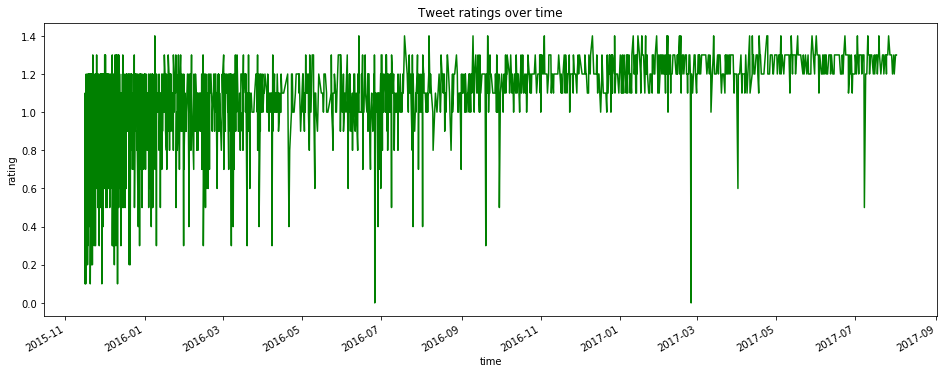

In [90]:
# plot rating over time
rating_history = clean_t_archive.groupby('timestamp')['rating'].mean()
rating_history.plot(kind='line', figsize= (16,6), color= 'green')

plt.title('Tweet ratings over time')
plt.xlabel('time')
plt.ylabel('rating')

**Insight**

We can read from the general slope of the line that the tweet rating  improved over time. In 2015 and 2016, there were many ratings below 1.0 but this was not the case in 2017. So it means that the twitter account grew a highher engagement rate with time.

# D. The most common dog type

In [91]:
#Value count for dog stages 
type_df = clean_t_archive.p1.value_counts()
type_df

Golden Retriever             136
Labrador Retriever            92
Pembroke                      88
Chihuahua                     79
Pug                           54
Chow                          41
Samoyed                       40
Toy Poodle                    38
Pomeranian                    37
Malamute                      29
Cocker Spaniel                27
French Bulldog                26
Chesapeake Bay Retriever      23
Miniature Pinscher            22
Seat Belt                     21
German Shepherd               20
Staffordshire Bullterrier     19
Siberian Husky                19
Shetland Sheepdog             18
Maltese Dog                   18
Eskimo Dog                    18
Rottweiler                    17
Teddy                         17
Beagle                        17
Cardigan                      17
Shih-Tzu                      17
Lakeland Terrier              16
Italian Greyhound             16
Web Site                      15
Kuvasz                        15
          

Text(0.5,1,'Most common dog type')

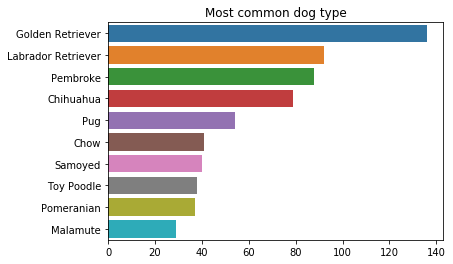

In [93]:
import seaborn as sns


dog_type = clean_t_archive['p1'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.title('Most common dog type')

**Insight**

From the data above, the most common dog type is the Golden retriever. 